In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import LabelEncoder

# Pre-Process Data

In [2]:
archivo = pd.read_csv("heart.csv")
df = pd.DataFrame(archivo)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
dfM = df.copy()

dfM.dropna(subset=["Cholesterol", "RestingBP"], inplace=True)


dfM.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
label_encoder = sk.preprocessing.LabelEncoder()

dfM['Sex'] = label_encoder.fit_transform(df['Sex'])
dfM['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
dfM['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
dfM['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
dfM['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

dfM

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


# Variable Analysis

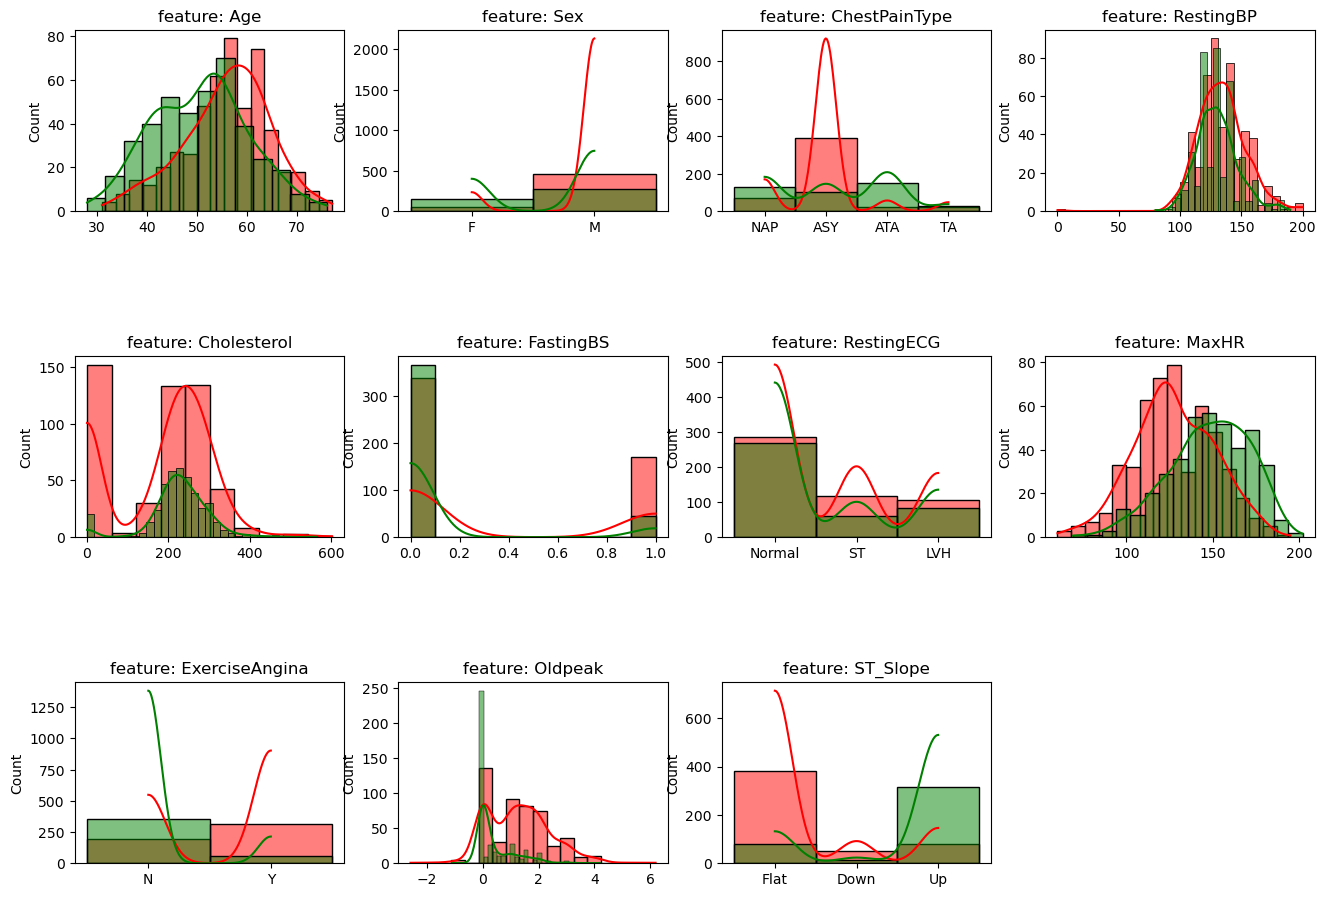

In [7]:
f = df.drop("HeartDisease", axis = 1)

plt.figure(figsize=(16,32))

gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(f):
    ax = plt.subplot(gs[i])
    sns.histplot(df[f][df["HeartDisease"] == 1], color='r', kde=True) #Las personas enfermas estarán en rojo
    sns.histplot(df[f][df["HeartDisease"] == 0], color='g', kde=True) #Las personas sanas estarán en verde
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))
    
plt.show()

#Viendo los gráficos, se ve que hay correlaciones menores.

#Entre más vieja es la persona, más propensa a es a sufrir enfermedades del corazón
#El Max Heart Rate es más bajo en personas que están enfermas
#Las personas con Anginas producidas en ejercicio, son más propensas a sufrir enfermedades del corazón
#La cantidad de hombres es mayor a la de mujeres, por lo que decir que sufren más enfermedades del corazón no es prudente

The amount of Healthy People are 410
The amount of Sick People are 508


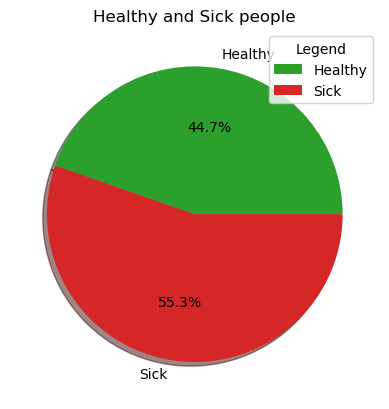

In [8]:
HealthyPeople = df[df["HeartDisease"]==0]["HeartDisease"].count()

SickPeople = df[df["HeartDisease"]==1]["HeartDisease"].count()

print("The amount of Healthy People are", HealthyPeople)
print("The amount of Sick People are", SickPeople)

fig, ax = plt.subplots()

counts = [HealthyPeople, SickPeople]
pie_labels = ['Healthy', 'Sick']
pie_colors = ['tab:green', 'tab:red']

ax.pie(counts, labels=pie_labels, colors=pie_colors, shadow=True, autopct="%1.1f%%", )

ax.set_title('Healthy and Sick people')
ax.legend(title='Legend')

plt.show()


De forma preliminar, el 55.3% de las personas tienen alguna afección cardíaca

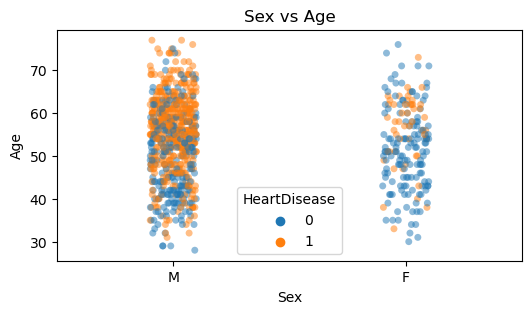

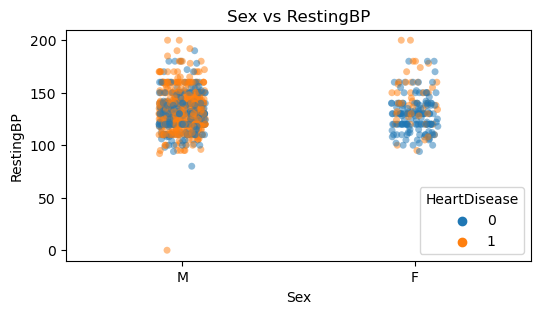

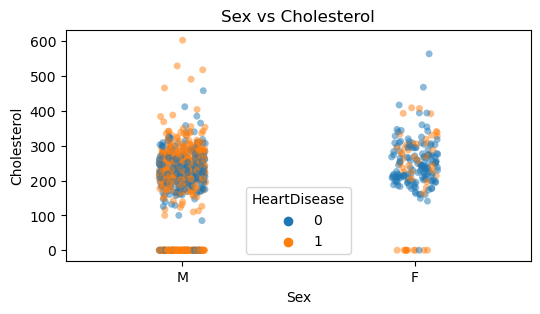

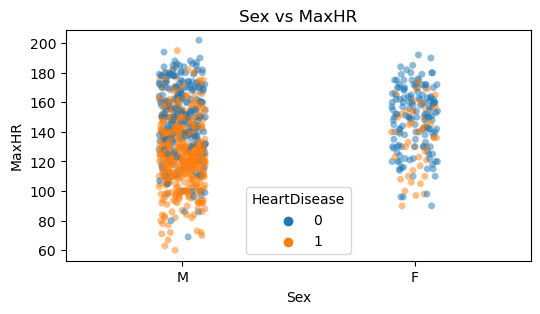

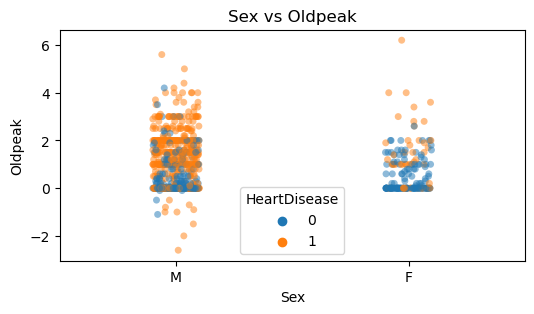

In [9]:
# Supongamos que df es tu DataFrame y "X" es la columna que se utiliza en el eje X
x_column = "Sex"

# Obteniendo la lista de todas las columnas, excluyendo la columna "X" y "HeartDisease"
y = [col for col in df.columns if col not in [x_column ,"ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS", "HeartDisease"]]

# Iteración a través de las columnas en y_columns
for y_column in y:
    plt.figure(figsize = (6,3))
    sns.stripplot(data=df, x=x_column, y=y_column, hue="HeartDisease", jitter=True, alpha=0.5)
    plt.title(f'{x_column} vs {y_column}')

plt.show()

Los hombres y mujeres tienen una cantidad dispar de ejemplos, por lo que no es prudente hacer conclusiones
por la calidad del DataSet.

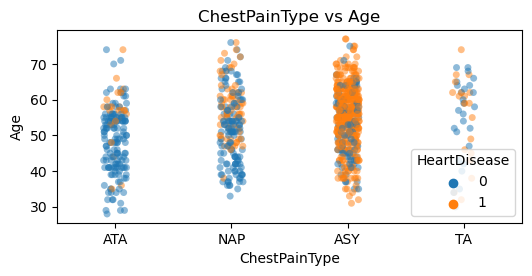

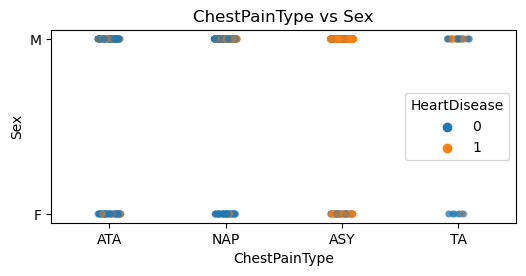

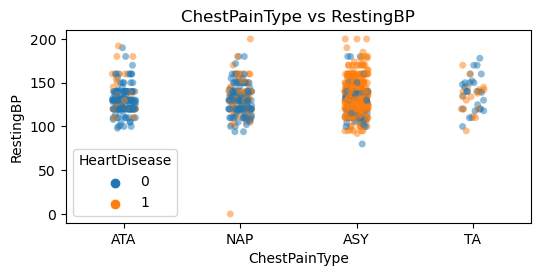

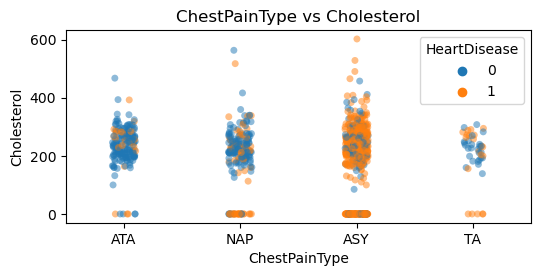

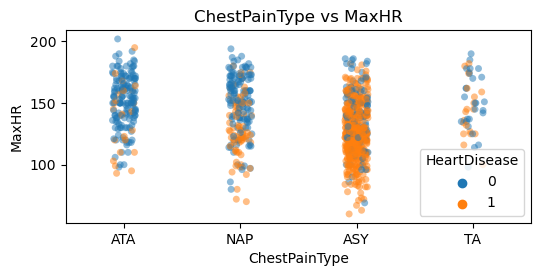

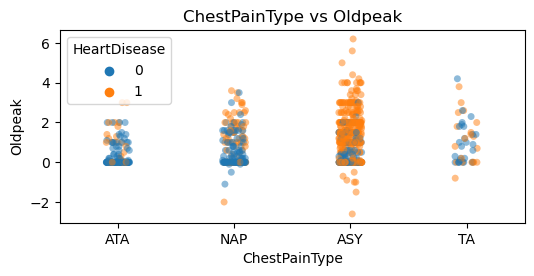

In [10]:
# Supongamos que df es tu DataFrame y "X" es la columna que se utiliza en el eje X
x_column = "ChestPainType"

# Obteniendo la lista de todas las columnas, excluyendo la columna "X" y "HeartDisease"
y = [col for col in df.columns if col not in [x_column ,"ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS", "HeartDisease"]]

# Iterando a través de las columnas en y_columns
for y_column in y:
    plt.figure(figsize = (6,2.5))
    sns.stripplot(data=df, x=x_column, y=y_column, hue="HeartDisease", jitter=True, alpha=0.5)
    plt.title(f'{x_column} vs {y_column}')

plt.show()

En su gran mayoría, la cantidad de personas que han sufrido de afecciones cardíacas tienen tipos de dolor asintomáticos.
El MaxHR no tiene que ser necesariamente alto para mostrar afecciones en caso de tener un dolor asintomático, redondea
valores de entre 100 y 140.
Para los dolores que no provienen de anginas (NAP), normalmente las personas con más de 55 años son aquellas que presentan
mayores afecciones cardíacas.
Por algún motivo, hay algunos valores atípicos menores que 0 en la variable de Oldpeak.

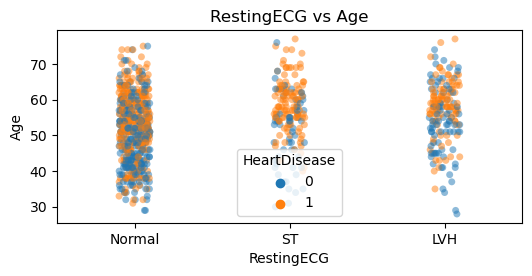

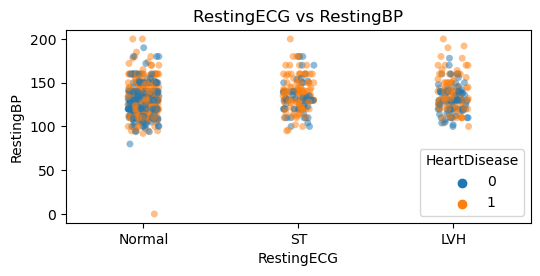

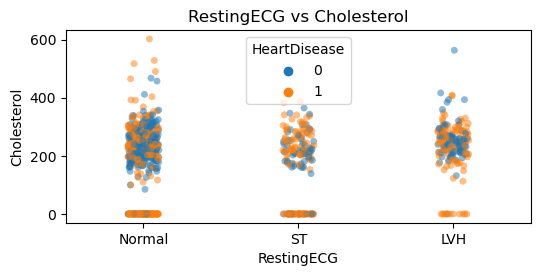

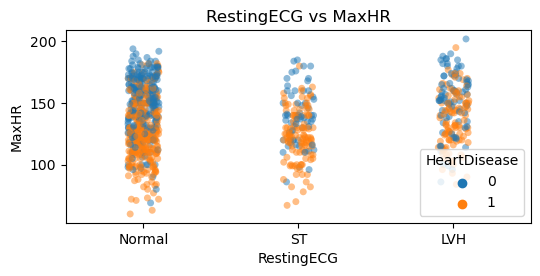

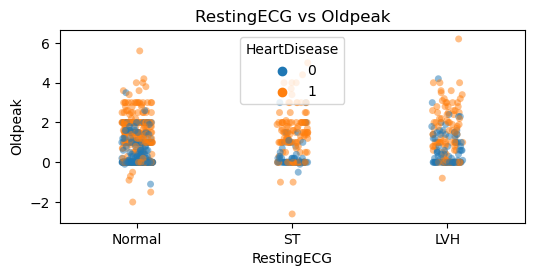

In [11]:
# Supongamos que df es tu DataFrame y "X" es la columna que se utiliza en el eje X
x_column = "RestingECG"

# Obteniendo la lista de todas las columnas, excluyendo la columna "X" y "HeartDisease"
y = [col for col in df.columns if col not in [x_column ,"ChestPainType", "Sex", "ExerciseAngina", "ST_Slope", "FastingBS", "HeartDisease"]]

# Iterando a través de las columnas en y_columns
for y_column in y:
    plt.figure(figsize = (6,2.5))
    sns.stripplot(data=df, x=x_column, y=y_column, hue="HeartDisease", jitter=True, alpha=0.5)
    plt.title(f'{x_column} vs {y_column}')

plt.show()

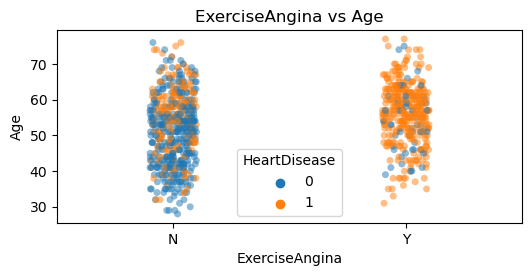

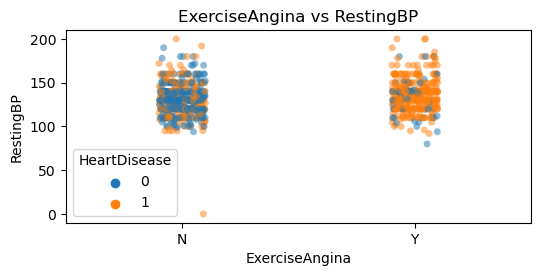

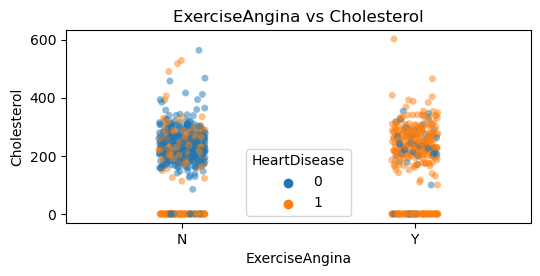

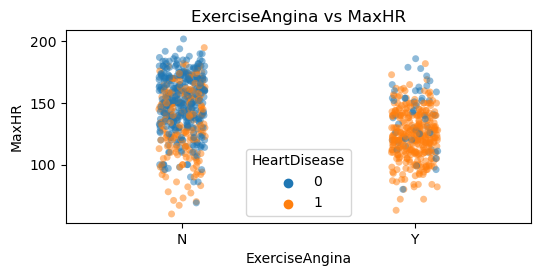

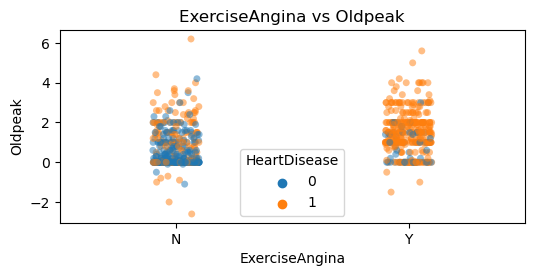

In [12]:
# Supongamos que df es tu DataFrame y "X" es la columna que se utiliza en el eje X
x_column = "ExerciseAngina"

# Obteniendo la lista de todas las columnas, excluyendo la columna "X" y "HeartDisease"
y = [col for col in df.columns if col not in [x_column ,"ChestPainType", "RestingECG", "Sex", "ST_Slope", "FastingBS", "HeartDisease"]]

# Iterando a través de las columnas en y_columns
for y_column in y:
    plt.figure(figsize = (6,2.5))
    sns.stripplot(data=df, x=x_column, y=y_column, hue="HeartDisease", jitter=True, alpha=0.5)
    plt.title(f'{x_column} vs {y_column}')

plt.show()

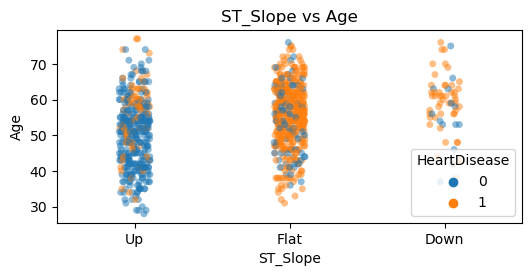

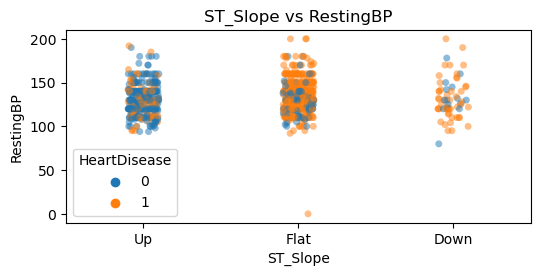

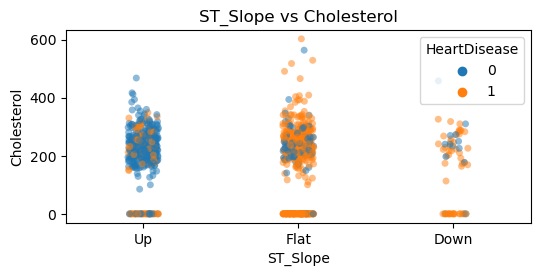

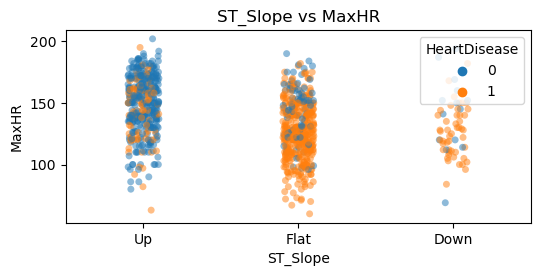

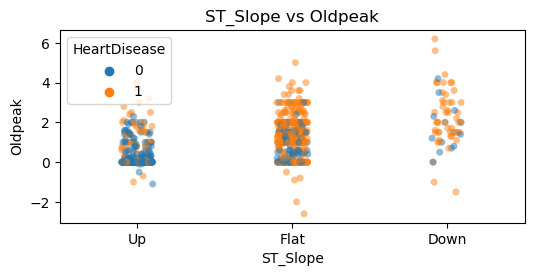

In [13]:
# Supongamos que df es tu DataFrame y "X" es la columna que se utiliza en el eje X
x_column = "ST_Slope"

# Obtén la lista de todas las columnas, excluyendo la columna "X" y "HeartDisease"
y = [col for col in df.columns if col not in [x_column ,"ChestPainType", "RestingECG", "Sex", "ExerciseAngina", "FastingBS", "HeartDisease"]]

# Itera a través de las columnas en y_columns
for y_column in y:
    plt.figure(figsize = (6,2.5))
    sns.stripplot(data=df, x=x_column, y=y_column, hue="HeartDisease", jitter=True, alpha=0.5)
    plt.title(f'{x_column} vs {y_column}')

plt.show()

# Prediction Model

In [14]:
# Separamos el conjunto de datos 60% train set, 40% test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dfM, test_size=0.4, random_state=42, stratify=dfM["HeartDisease"])

In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 322 to 329
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             550 non-null    int64  
 1   Sex             550 non-null    int32  
 2   ChestPainType   550 non-null    int32  
 3   RestingBP       550 non-null    int64  
 4   Cholesterol     550 non-null    int64  
 5   FastingBS       550 non-null    int64  
 6   RestingECG      550 non-null    int32  
 7   MaxHR           550 non-null    int64  
 8   ExerciseAngina  550 non-null    int32  
 9   Oldpeak         550 non-null    float64
 10  ST_Slope        550 non-null    int32  
 11  HeartDisease    550 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 45.1 KB


In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 546 to 466
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             368 non-null    int64  
 1   Sex             368 non-null    int32  
 2   ChestPainType   368 non-null    int32  
 3   RestingBP       368 non-null    int64  
 4   Cholesterol     368 non-null    int64  
 5   FastingBS       368 non-null    int64  
 6   RestingECG      368 non-null    int32  
 7   MaxHR           368 non-null    int64  
 8   ExerciseAngina  368 non-null    int32  
 9   Oldpeak         368 non-null    float64
 10  ST_Slope        368 non-null    int32  
 11  HeartDisease    368 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 30.2 KB


In [17]:
# Separamos el conjunto de datos de pruebas 50% validation set, 50% test set
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [18]:
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 550
Longitud del Validation Set: 184
Longitud del Test Set: 184


In [19]:
X_train = train_set.drop("HeartDisease", axis=1)
y_train = train_set["HeartDisease"].copy()

X_test = test_set.drop("HeartDisease", axis=1)
y_test = test_set["HeartDisease"].copy()

X_val = val_set.drop("HeartDisease", axis=1)
y_val = val_set["HeartDisease"].copy()

In [20]:
# Comprobamos si existe algún atributo con valores nulos
X_train.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
dtype: bool

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

Z:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
coeficientes = clf.coef_[0]  # Coeficientes de las características
intercept = clf.intercept_[0]  # Término independiente (intercept)


formula = "P(y = 1) = 1 / (1 + e^(" + str(intercept)
for i, coef in enumerate(coeficientes):
    formula += " + " + str(coef) + " * x" + str(i)
formula += "))"
print(formula)

P(y = 1) = 1 / (1 + e^(0.33690817420806984 + 0.028028634343099747 * x0 + 1.3158082030441076 * x1 + -0.6674786157800139 * x2 + 0.008174957445388148 * x3 + -0.0037277336845898583 * x4 + 1.109116189747925 * x5 + -0.06833361555073478 * x6 + -0.006097496229254824 * x7 + 1.0768066776535727 * x8 + 0.2625616991658183 * x9 + -1.7288461874387162 * x10))


In [23]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [24]:
print("Predicción:\n", y_pred)
print("\nEtiquetas reales:\n", y_test)

Predicción:
 [0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1]

Etiquetas reales:
 620    0
284    0
47     0
200    0
564    1
      ..
755    1
814    1
119    1
892    0
248    1
Name: HeartDisease, Length: 184, dtype: int64


In [25]:
from sklearn.metrics import accuracy_score

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.842


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Predecimos con el conjunto de datos de entrenamiento
y_train_pred = clf_tree.predict(X_train)

In [28]:
from sklearn.metrics import f1_score
print("F1 Score Train Set:", f1_score(y_train_pred, y_train, average='weighted'))

F1 Score Train Set: 1.0


In [29]:
# Predecimos con el conjunto de datos de validación
y_val_pred = clf_tree.predict(X_val)

In [30]:
# Comparamos resultados entre escalado y sin escalar
print("F1 Score Validation Set:", f1_score(y_val_pred, y_val, average='weighted'))

F1 Score Validation Set: 0.7875067515844366


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Modelo entrenado con el conjunto de datos
clf_rnd = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [32]:
# Predecimos con el conjunto de datos de entrenamiento y validación
y_train_pred1 = clf_rnd.predict(X_train)
y_val_pred1 = clf_rnd.predict(X_val)

print("F1 Score Train Set:", f1_score(y_train_pred1, y_train, average='weighted'))
print("F1 Score Validation Set:", f1_score(y_val_pred1, y_val, average='weighted'))

F1 Score Train Set: 1.0
F1 Score Validation Set: 0.8914611204013376


## Support Vector Machine SVM

In [43]:
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=20)
svm_clf.fit(X_train, y_train)

SVC(C=20, coef0=10, kernel='poly')

In [45]:
y_pred = svm_clf.predict(X_val)

In [46]:
print("F1 Score:", f1_score(y_pred, y_val))

F1 Score: 0.8985507246376813
